Importing Libraries


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.externals import joblib
  

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Input Dataset

In [2]:
insurance_data = pd.read_csv('/content/drive/MyDrive/Datascience/Insurance Dataset.csv')

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [6]:
insurance_data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [7]:
insurance_data.tail()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,29,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,231,Other infectious & parasitic diseases,2,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,Hepatic coma & other major acute liver disorders,4,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3
1048574,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,2,Emergency,Home or Self Care,106,0,Cardiac arrhythmia & conduction disorders,1,1.0,Medical,0,N,Y,24832.23,4974.66,0.200331,1,2


In [8]:
insurance_data.shape

(1048575, 24)

Data Cleaning


In [9]:
insurance_data.isnull().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

Dropping NA Values

In [3]:
insurance_data.dropna(inplace=True)

In [4]:
insurance_data.shape

(1046077, 24)

Dropping Duplicates

In [5]:
insurance_data.drop_duplicates(inplace=True,ignore_index=True)

In [13]:
insurance_data.shape

(1041265, 24)

In [14]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Hospital County                        1041265 non-null  object 
 2   Hospital Id                            1041265 non-null  float64
 3   Age                                    1041265 non-null  object 
 4   Gender                                 1041265 non-null  object 
 5   Cultural_group                         1041265 non-null  object 
 6   ethnicity                              1041265 non-null  object 
 7   Days_spend_hsptl                       1041265 non-null  object 
 8   Admission_type                         1041265 non-null  object 
 9   Home or self care,                     1041265 non-null  object 
 10  ccs_diagnosis_code                     104

In [15]:
insurance_data.describe()

,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06
mean,6.525299e+02,1.986232e+02,9.708783e+01,2.057127e+00,1.753033e+00,2.822095e+02,2.721891e+04,1.050903e+04,4.560897e-01,7.494355e-01,1.938392e+00
std,6.696444e+02,1.655839e+02,8.729973e+01,9.141524e-01,9.875512e-01,9.324650e+02,5.502059e+04,2.234352e+04,8.026395e-01,4.333383e-01,7.717183e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,2.130000e+02,1.080000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.480430e+03,3.264680e+03,3.133504e-01,0.000000e+00,1.000000e+00
50%,6.300000e+02,1.590000e+02,8.800000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.468769e+04,5.962550e+03,4.089940e-01,1.000000e+00,2.000000e+00
75%,9.770000e+02,2.180000e+02,1.730000e+02,3.000000e+00,3.000000e+00,0.000000e+00,2.928040e+04,1.138990e+04,5.186988e-01,1.000000e+00,3.000000e+00
max,9.250000e+03,6.700000e+02,2.310000e+02,4.000000e+00,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02,1.000000e+00,5.000000e+00


Feature selection

In [6]:
insurance_data.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [7]:
insurance_data = insurance_data[['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges','Payment_Typology',
       'Result']]

In [18]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Hospital County                        1041265 non-null  object 
 2   Hospital Id                            1041265 non-null  float64
 3   Age                                    1041265 non-null  object 
 4   Gender                                 1041265 non-null  object 
 5   Cultural_group                         1041265 non-null  object 
 6   ethnicity                              1041265 non-null  object 
 7   Days_spend_hsptl                       1041265 non-null  object 
 8   Admission_type                         1041265 non-null  object 
 9   Home or self care,                     1041265 non-null  object 
 10  ccs_diagnosis_code                     104

In [8]:
cols = ['Area_Service', 'Hospital County',  'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Payment_Typology',
       'Result']
insurance_data[cols] = insurance_data[cols].apply(LabelEncoder().fit_transform)

In [9]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  int64  
 1   Hospital County                        1041265 non-null  int64  
 2   Hospital Id                            1041265 non-null  float64
 3   Age                                    1041265 non-null  int64  
 4   Gender                                 1041265 non-null  int64  
 5   Cultural_group                         1041265 non-null  int64  
 6   ethnicity                              1041265 non-null  int64  
 7   Days_spend_hsptl                       1041265 non-null  int64  
 8   Admission_type                         1041265 non-null  int64  
 9   Home or self care,                     1041265 non-null  int64  
 10  ccs_diagnosis_code                     104

In [10]:
Features = insurance_data.drop(columns='Result', axis=1)
Target = insurance_data['Result']

In [11]:
#Apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(Features,Target)

In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Features.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [13]:
print(featureScores.nlargest(22,'Score'))

                                    Specs          Score
19                              Tot_charg  129002.707318
20                               Tot_cost   96964.827951
2                             Hospital Id    1328.119854
16                            Weight_baby     440.779003
1                         Hospital County      18.289304
11                     ccs_procedure_code      15.800231
12                    apr_drg_description      13.832817
7                        Days_spend_hsptl       5.664767
14                         Mortality risk       3.570888
13                           Code_illness       3.508367
15                       Surg_Description       3.323676
18                  Emergency dept_yes/No       3.245688
8                          Admission_type       3.086264
3                                     Age       3.084688
6                               ethnicity       2.277035
10                     ccs_diagnosis_code       1.358071
22                       Paymen

In [25]:
model = ExtraTreesClassifier()
model.fit(Features,Target)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

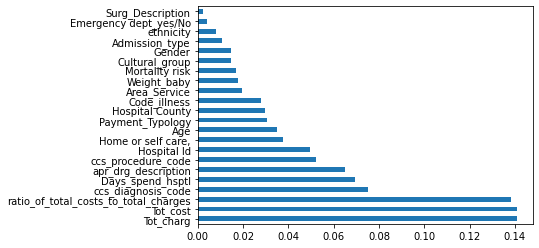

In [26]:
feat_importances = pd.Series(model.feature_importances_, index=Features.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

In [27]:
correlation = insurance_data.corr()

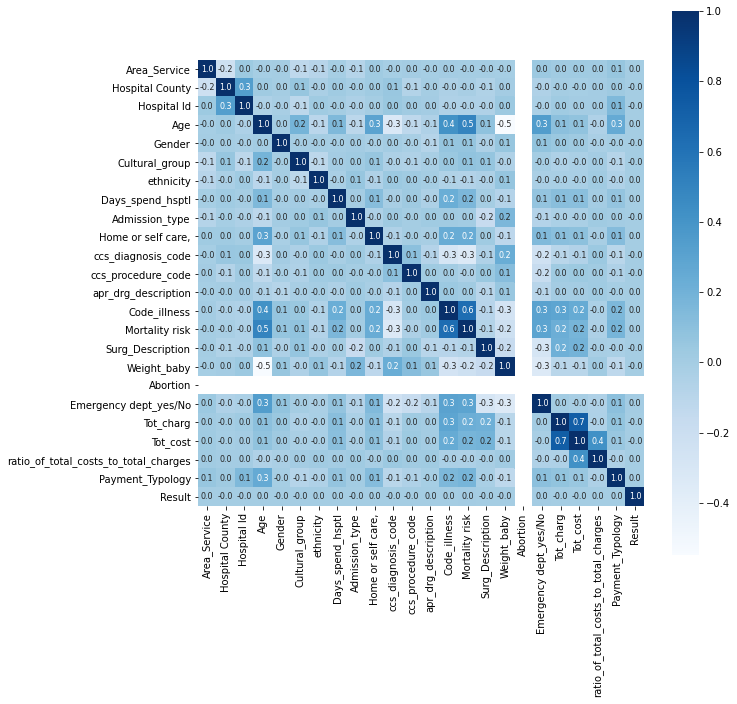

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

So Comparing these methods
We can drop the following
-

1.   Abortion
2.   Hospital_ID
3.   Hospital County 
4.   Area Service
5.   Cultural Group
6.   Ethnicity
7.   apr_drug_description
8.   Weight_baby



In [14]:
insurance_data.drop(['Area_Service','Hospital County','Hospital Id','Cultural_group',"ethnicity","apr_drg_description","Weight_baby",'Abortion'], axis=1, inplace=True)

In [15]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 16 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Age                                    1041265 non-null  int64  
 1   Gender                                 1041265 non-null  int64  
 2   Days_spend_hsptl                       1041265 non-null  int64  
 3   Admission_type                         1041265 non-null  int64  
 4   Home or self care,                     1041265 non-null  int64  
 5   ccs_diagnosis_code                     1041265 non-null  int64  
 6   ccs_procedure_code                     1041265 non-null  int64  
 7   Code_illness                           1041265 non-null  int64  
 8   Mortality risk                         1041265 non-null  float64
 9   Surg_Description                       1041265 non-null  int64  
 10  Emergency dept_yes/No                  104

In [16]:
insurance_data['Result'].value_counts()

1    780361
0    260904
Name: Result, dtype: int64

In [32]:
insurance_data['Age'].value_counts()

4    305802
3    281714
2    197730
0    140040
1    115979
Name: Age, dtype: int64

In [33]:
insurance_data['Admission_type'].value_counts()

1    606383
0    235122
5    109946
2     86542
4      2256
3      1016
Name: Admission_type, dtype: int64

In [34]:
insurance_data['Home or self care,'].value_counts()

7     688168
8     131885
18    108858
4      22781
17     21414
12     17349
13     16965
16      6687
11      4781
10      4733
0       4533
5       3480
2       3256
15      2127
1       1880
9       1874
6        455
3         32
14         7
Name: Home or self care,, dtype: int64

In [35]:
Q1 = insurance_data.quantile(0.25)
Q3 = insurance_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                                          2.000000
Gender                                       1.000000
Days_spend_hsptl                            22.000000
Admission_type                               0.000000
Home or self care,                           1.000000
ccs_diagnosis_code                         105.000000
ccs_procedure_code                         170.000000
Code_illness                                 2.000000
Mortality risk                               2.000000
Surg_Description                             0.000000
Emergency dept_yes/No                        1.000000
Tot_charg                                21799.970000
Tot_cost                                  8125.220000
ratio_of_total_costs_to_total_charges        0.205348
Payment_Typology                             2.000000
Result                                       1.000000
dtype: float64


In [36]:
df_out = insurance_data[~((insurance_data < (Q1 - 1.5 * IQR)) |(insurance_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(330384, 16)


In [17]:
x = insurance_data.drop(columns='Result', axis=1)
y = insurance_data['Result']

In [18]:
clf = IsolationForest(random_state=42,contamination=0.1)
clf.fit(x,y)
y_outliers = clf.predict(x)
insurance_data['y_outliers'] = y_outliers
insurance_data[insurance_data['y_outliers']==-1]

,Age,Gender,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Surg_Description,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology,Result,y_outliers
1,4,0,54,5,17,180,0,2,2.0,0,1,4783.20,5162.82,1.079365,0,1,-1
3,0,0,0,5,7,110,0,0,1.0,0,1,1108.20,1644.75,1.484167,0,0,-1
20,0,1,0,5,7,110,0,0,1.0,0,1,1301.70,1729.54,1.328677,0,0,-1
27,2,0,0,0,17,227,0,0,1.0,0,1,1493.39,2010.51,1.346271,0,1,-1
40,4,0,0,0,17,140,0,2,4.0,0,1,2534.19,3421.83,1.350267,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041236,2,0,31,1,8,104,74,3,4.0,1,0,361193.61,77497.73,0.214560,2,1,-1
1041239,3,1,28,1,4,138,213,3,4.0,0,1,134722.94,28085.03,0.208465,2,0,-1
1041249,3,0,27,1,18,220,5,0,1.0,1,0,120200.08,27983.66,0.232809,2,1,-1
1041251,3,1,54,1,18,49,154,1,3.0,1,1,43148.91,10528.01,0.243992,2,1,-1


In [19]:
insurance_data['y_outliers'].value_counts()

 1    937138
-1    104127
Name: y_outliers, dtype: int64

In [20]:
insurance_data.drop(insurance_data[insurance_data['y_outliers'] == -1].index, inplace = True)

In [21]:
insurance_data = insurance_data.drop(columns=['y_outliers'])

In [22]:
x = insurance_data.drop(columns='Result', axis=1)
y = insurance_data['Result']

In [43]:
insurance_data['Result'].value_counts()

1    702628
0    234510
Name: Result, dtype: int64

In [23]:
sample_insurance_data = insurance_data.sample(frac =0.10)


In [24]:
sample_insurance_data.shape

(93714, 16)

In [46]:
sample_insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93714 entries, 386955 to 650076
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    93714 non-null  int64  
 1   Gender                                 93714 non-null  int64  
 2   Days_spend_hsptl                       93714 non-null  int64  
 3   Admission_type                         93714 non-null  int64  
 4   Home or self care,                     93714 non-null  int64  
 5   ccs_diagnosis_code                     93714 non-null  int64  
 6   ccs_procedure_code                     93714 non-null  int64  
 7   Code_illness                           93714 non-null  int64  
 8   Mortality risk                         93714 non-null  float64
 9   Surg_Description                       93714 non-null  int64  
 10  Emergency dept_yes/No                  93714 non-null  int64  
 

In [47]:
sample_insurance_data

,Age,Gender,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Surg_Description,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology,Result
386955,4,0,54,1,7,123,0,0,1.0,0,1,15285.49,4687.35,0.306653,1,1
178858,2,0,0,1,7,58,219,0,1.0,0,1,5840.01,2532.42,0.433632,1,1
19399,3,1,54,1,7,96,0,1,3.0,0,1,8252.05,6868.08,0.832287,1,1
146359,2,1,54,1,7,243,0,0,1.0,0,1,5651.27,2478.74,0.438616,0,0
290743,1,0,32,0,7,164,134,1,1.0,0,0,5319.78,3275.75,0.615767,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420754,1,0,43,0,7,167,131,1,1.0,1,0,9208.88,4770.71,0.518056,0,1
390543,2,0,32,0,7,175,136,0,1.0,0,0,6052.50,6040.97,0.998096,0,1
235387,4,1,43,1,18,83,0,3,2.0,0,1,12888.86,5728.53,0.444456,0,1
401609,2,0,32,0,7,179,134,0,1.0,0,0,5186.50,3019.42,0.582169,0,1


In [48]:
insurance_data['Result'].value_counts()

1    702628
0    234510
Name: Result, dtype: int64

In [49]:
sample_insurance_data['Result'].value_counts()

1    70178
0    23536
Name: Result, dtype: int64

In [25]:
x_sample = sample_insurance_data.drop(columns='Result', axis=1)
y_sample = sample_insurance_data['Result']

In [26]:
smk = SMOTETomek()
x_res,y_res=smk.fit_sample(x_sample,y_sample)
x_res.shape,y_res.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((130086, 15), (130086,))

In [27]:
print('Original dataset shape {}'.format(Counter(y_sample)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 70220, 0: 23494})
Resampled dataset shape Counter({1: 65043, 0: 65043})


In [28]:
x_sampled=pd.DataFrame(x_res)
y_sampled=pd.DataFrame(y_res)

In [29]:
x_sampled.columns=['Age',	'Gender',	'Days_spend_hsptl',	'Admission_type',	'Home or self care','ccs_diagnosis_code',	'ccs_procedure_code','Code_illness','	Mortality risk','Surg_Description','Emergency dept_yes/No','Tot_charg',	'Tot_cost','ratio_of_total_costs_to_total_charges','Payment_Typology']

In [30]:
y_sampled.columns=['Result']

In [31]:
x_sample_train, x_sample_test, y_sample_train, y_sample_test = train_test_split(x_sampled, y_sampled, test_size=0.2, stratify=y_sampled, random_state=2)

In [32]:
print(x_sampled.shape, x_sample_test.shape, x_sample_train.shape)

(130086, 15) (26018, 15) (104068, 15)


In [33]:
print(y_sampled.shape, y_sample_test.shape, y_sample_train.shape)

(130086, 1) (26018, 1) (104068, 1)


Logistic Regression

In [34]:
Logistic_model = LogisticRegression()

In [35]:
Logistic_model.fit(x_sample_train, y_sample_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
x_train_prediction = Logistic_model.predict(x_sample_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_sample_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.5004131913748703


In [37]:
x_test_prediction = Logistic_model.predict(x_sample_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_sample_test)
print('Accuracy on Testing data : ', training_data_accuracy)

Accuracy on Testing data :  0.5004131913748703


Random Forest Classifier

In [38]:
RFC_model = RandomForestClassifier()

In [39]:
RFC_model.fit(x_sample_train, y_sample_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
x_train_prediction = RFC_model.predict(x_sample_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_sample_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9980973978552485


In [41]:
x_test_prediction = RFC_model.predict(x_sample_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_sample_test)
print('Accuracy on Testing data : ', training_data_accuracy)

Accuracy on Testing data :  0.9980973978552485


In [ ]:
input_data = (	)
4	,1,	54,	1,	18,	209,	0,	2,	3.0,	0,	1,	11643.72,	4009.35,	0.344336,	2	
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = RFC_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Genuine Claim')
else:
  print('Fraud Claim')

In [42]:
insurance_data

,Age,Gender,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Surg_Description,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology,Result
0,2,0,54,0,7,110,0,0,1.0,0,1,5511.95,5582.49,1.012798,0,1
2,2,0,43,5,7,110,0,0,1.0,0,1,3829.15,4056.52,1.059379,0,1
4,4,0,43,0,7,110,0,1,3.0,0,1,3418.18,3370.87,0.986161,0,1
5,0,0,0,0,7,130,0,0,1.0,0,1,1386.10,1919.46,1.384794,0,1
6,1,1,43,0,7,110,0,1,1.0,0,1,3373.10,3597.63,1.066565,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041260,4,0,76,1,18,94,29,1,3.0,0,1,69650.41,13896.82,0.199522,2,1
1041261,0,0,32,1,7,7,227,1,1.0,0,0,13587.38,3918.35,0.288382,2,1
1041262,3,1,25,1,15,138,87,3,4.0,0,1,104629.78,24746.64,0.236516,2,0
1041263,2,0,32,1,7,131,85,0,1.0,1,1,27521.41,6766.04,0.245846,2,1


In [43]:
x = insurance_data.drop(columns='Result', axis=1)
y = insurance_data['Result']

In [44]:
insurance_data['Result'].value_counts()

1    702628
0    234510
Name: Result, dtype: int64

In [45]:
smk = SMOTETomek()
x_res_whole,y_res_whole = smk.fit_sample(x,y)
x_res_whole.shape,y_res_whole.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((1315280, 15), (1315280,))

In [46]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res_whole)))

Original dataset shape Counter({1: 702628, 0: 234510})
Resampled dataset shape Counter({1: 657640, 0: 657640})


In [47]:
x_whole=pd.DataFrame(x_res_whole)
y_whole=pd.DataFrame(y_res_whole)

In [48]:
x_whole.columns=['Age',	'Gender',	'Days_spend_hsptl',	'Admission_type',	'Home or self care','ccs_diagnosis_code',	'ccs_procedure_code','Code_illness','	Mortality risk','Surg_Description','Emergency dept_yes/No','Tot_charg',	'Tot_cost','ratio_of_total_costs_to_total_charges','Payment_Typology']
y_whole.columns=['Result']

In [49]:
y_whole

,Result
0,1
1,1
2,1
3,1
4,1
...,...
1315275,0
1315276,0
1315277,0
1315278,0


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_whole, y_whole, test_size=0.2, stratify=y_whole, random_state=2)

In [51]:
print(x_whole.shape, x_train.shape, x_test.shape)

(1315280, 15) (1052224, 15) (263056, 15)


RFC on whole dataset

In [60]:
RFC_model_whole = RandomForestClassifier(max_features=3,min_samples_leaf=3,min_samples_split=2,n_jobs=-1)

In [61]:
RFC_model_whole.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [62]:
x_train_prediction_whole = RFC_model_whole.predict(x_train)
training_data_accuracy_whole = accuracy_score(x_train_prediction_whole, y_train)
print('Accuracy on Training data : ', training_data_accuracy_whole)

Accuracy on Training data :  0.8692303159783468


In [63]:
print(classification_report(y_train,x_train_prediction_whole))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85    526112
           1       0.79      1.00      0.88    526112

    accuracy                           0.87   1052224
   macro avg       0.89      0.87      0.87   1052224
weighted avg       0.89      0.87      0.87   1052224



In [64]:
x_test_prediction_whole = RFC_model_whole.predict(x_test)
testing_data_accuracy_whole = accuracy_score(x_test_prediction_whole, y_test)
print('Accuracy on Training data : ', testing_data_accuracy_whole)

Accuracy on Training data :  0.8297206678425887


In [65]:
print(classification_report(y_test,x_test_prediction_whole))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80    131528
           1       0.75      0.99      0.85    131528

    accuracy                           0.83    263056
   macro avg       0.87      0.83      0.83    263056
weighted avg       0.87      0.83      0.83    263056



In [67]:

### Create a Pickle file using serialization 

pickle_out = open("RCF.pkl","wb")
pickle.dump(RFC_model_whole, pickle_out)
pickle_out.close()

In [69]:
 joblib.dump(RFC_model_whole,  'RCF1.pkl',compress=3)

['RCF1.pkl']